In [42]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mlp

In [57]:
# настройки matplotlib
mlp.rcParams['lines.linewidth'] = 2

mlp.rcParams['xtick.major.size'] = 10
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 10
mlp.rcParams['xtick.color'] = '#696969'

mlp.rcParams['ytick.major.size'] = 10
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 10
mlp.rcParams['ytick.color'] = '#696969'

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 10
mlp.rcParams['axes.titlecolor'] = '#800000'
mlp.rcParams['axes.labelcolor'] = '#FF8C00'

In [38]:
def func(x):
    return x**3 - 6*x**2 - 15*x + 10

In [36]:
# генерируем точки
x = np.linspace(-5, 10, 150)

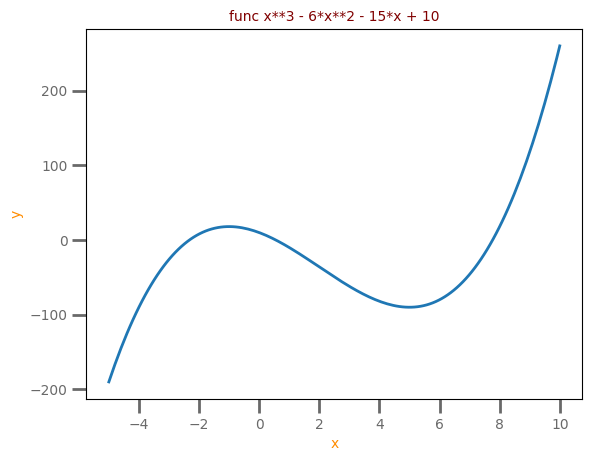

In [58]:
# строим график функции x**3 - 6*x**2 - 15*x + 10
fig.set_size_inches(10, 8)
fig = plt.figure()
plt.title('func x**3 - 6*x**2 - 15*x + 10')
plt.plot(x, func(x))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [59]:
# производная от x**3 - 6*x**2 - 15*x + 10
def func_derivative(x):
    return 3 * x**2 - 12 * x - 15

In [135]:
def descent_and_plot(X_start=10, learning_rate=0.01, threshold=0.0001):
    """
    X_start - случайная точка
    learning_rate - коэффициент для шага градиентного спуска(для корректировки нормы градиента)
    threshold - точка останова
    """
    # передаем параметры в функцию
    X_start = X_start
    learning_rate = learning_rate
    threshold = threshold
    
    # X_next для первой иттерации
    X_next = X_start - learning_rate * func_derivative(X_start)
    
    # рисуем график
    fig = plt.figure()
    fig.set_size_inches(10, 8)
    
    # график изначальной функции, прозрачность 0.5
    plt.plot(x, func(x), alpha=0.5)
    
    # нарисуем точки, цвет коричневый, размер точек s=80
    plt.scatter([X_start, X_next],
               [func(X_start), func(X_next)], 
               color = 'brown',
               s=80)
    
    # прямая , соединяющая точки старта и X_next
    plt.plot([X_start, X_next],
               [func(X_start), func(X_next)], 
               color = 'brown')
    
    plt.xlabel('x')
    plt.ylabel('y')

    counter = 0
    while abs(X_start - X_next) > threshold:
        counter += 1
        X_start = X_next
        X_next = X_start - learning_rate * func_derivative(X_start)
        # print(f'{counter} {X_start} {X_next}')
        
        # нарисуем точки, цвет коричневый, размер точек s=80
        plt.scatter([X_start, X_next],
                   [func(X_start), func(X_next)], 
                   color = 'brown',
                   s=80)
    
        # прямая , соединяющая точки старта и X_next
        plt.plot([X_start, X_next],
                   [func(X_start), func(X_next)], 
                   color = 'brown')
    print(f'Точка найденная в конце градиентного спуска: {X_next}\nШагов выполнено: {counter}')

Точка найденная в конце градиентного спуска: 5.000382502344409
Шагов выполнено: 43


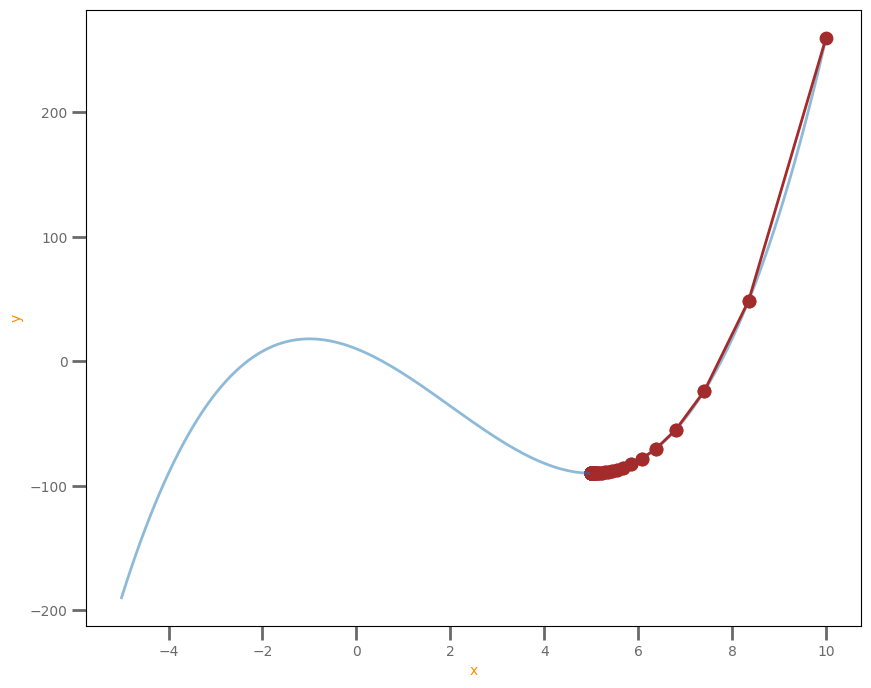

In [107]:
descent_and_plot()

Точка найденная в конце градиентного спуска: 5.000040328027253
Шагов выполнено: 44


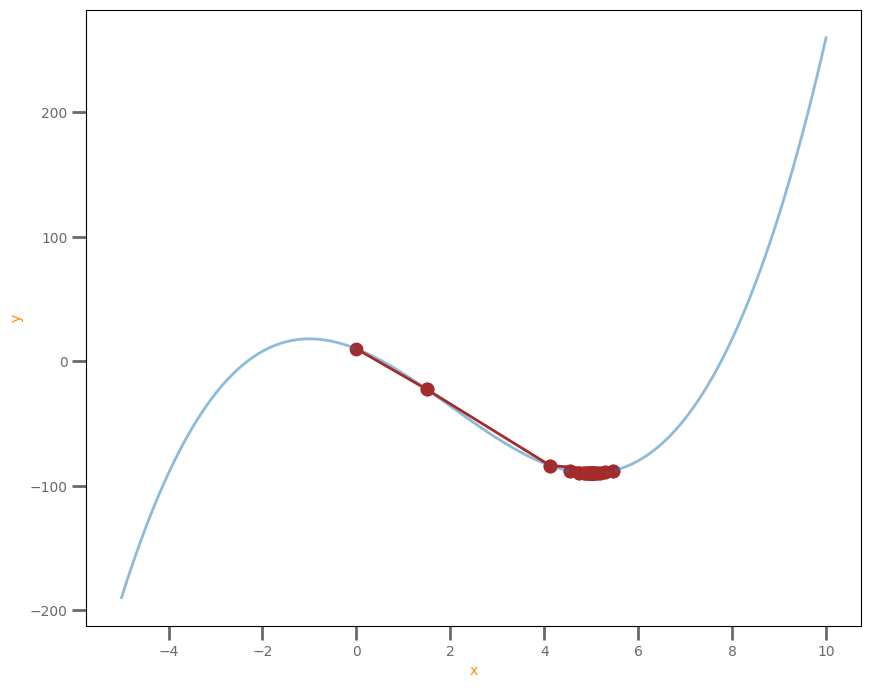

In [119]:
descent_and_plot(0, 0.1, 0.0001)

Точка найденная в конце градиентного спуска: 6.380349527189043
Шагов выполнено: 3


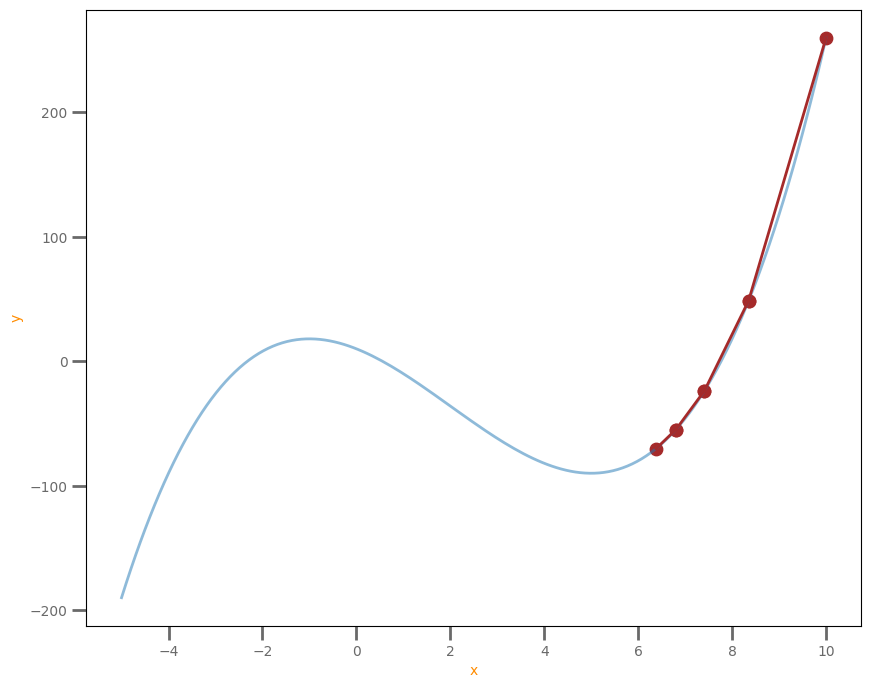

In [122]:
# большая точка останова, не добрались до минимума
descent_and_plot(10, 0.01, 0.5)

Точка найденная в конце градиентного спуска: 8.504805472225721
Шагов выполнено: 1161


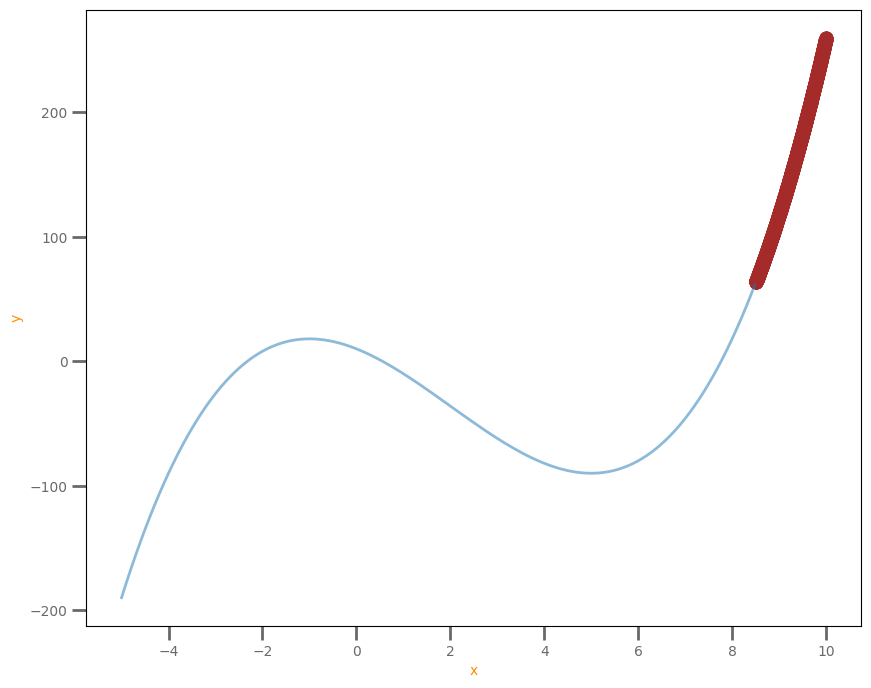

In [123]:
# слишком маленький learning rate, получилось много шагов и не добрались до минимума
descent_and_plot(10, 0.00001, 0.001)

Точка найденная в конце градиентного спуска: -1.0
Шагов выполнено: 0


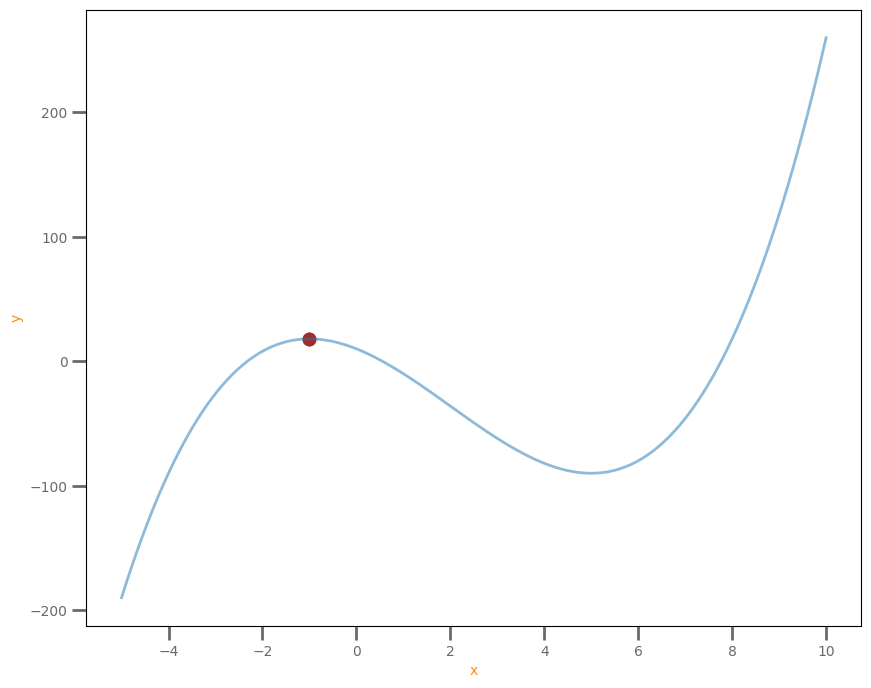

In [128]:
# неудачная точка старта - попали в локальный максимум где производная функции = 0 
descent_and_plot(-1.0, 0.01, 0.0001)

1 -2.21 -2.471723
2 -2.471723 -2.80161219766187
3 -2.80161219766187 -3.2232765885639276
4 -3.2232765885639276 -3.7717551381831282
5 -3.7717551381831282 -4.501149859437429
6 -4.501149859437429 -5.499098344283327
7 -5.499098344283327 -6.916192623600315
8 -6.916192623600315 -9.031147350634654
9 -9.031147350634654 -12.411733706777074
10 -12.411733706777074 -18.37267575982871
11 -18.37267575982871 -30.554053288282077
12 -30.554053288282077 -62.077044853171344
13 -62.077044853171344 -184.9830751666313
14 -184.9830751666313 -1233.5931871297341
15 -1233.5931871297341 -47034.03890957216
16 -47034.03890957216 -66418702.457993165
17 -66418702.457993165 -132343395475049.42
18 -132343395475049.42 -5.254432297761082e+26
19 -5.254432297761082e+26 -8.282717631526443e+51
20 -8.282717631526443e+51 -2.0581023409079703e+102
21 -2.0581023409079703e+102 -1.2707355736952604e+203


OverflowError: (34, 'Numerical result out of range')

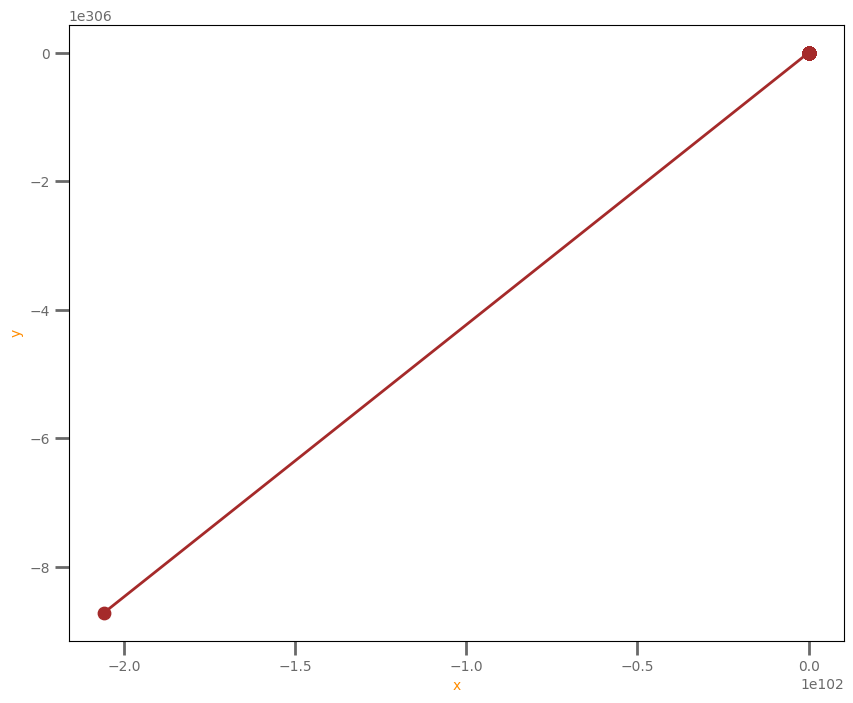

In [134]:
# взрыв градиента
descent_and_plot(-2, 0.01, 0.0001)